## Disponível online

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3-pt1.ipynb)

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/mntf/trabalho3-pt1](https://github.com/carlos-adir/UnB-Courses/blob/main/mntf/trabalho3-pt1.ipynb)

In [1]:
import os
os.system("pip install numpy")
os.system("pip install tqdm")
os.system("pip install matplotlib")
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from typing import List, Tuple, Callable, Optional
import warnings
from helper import solve_system, plot_field
warnings.filterwarnings("error")
np.set_printoptions(precision=3)

# A formulação de Diferenças Finitas

Primeiramente fazemos a formulação de diferenças finitas

$$
\dfrac{\partial T}{\partial t} \approx
\begin{bmatrix}
\dfrac{-1}{2\delta t} & 0 & \dfrac{1}{2\delta t}
\end{bmatrix} \cdot
\begin{bmatrix}
T(x, \ t-\delta t) \\ T(x, \ t) \\ T(x, \ t+\delta t)
\end{bmatrix} $$
$$
\dfrac{\partial^2T}{\partial x} \approx
\begin{bmatrix}
\dfrac{1}{\delta x^2} & \dfrac{-2}{\delta x^2} & \dfrac{1}{\delta x^2}
\end{bmatrix} \cdot
\begin{bmatrix}
T(x-\delta x, \ t) \\ T(x, \ t) \\ T(x+\delta x, \ t)
\end{bmatrix} $$

Então

$$
\left[\dfrac{\partial T}{\partial t}  - \dfrac{\partial^2T}{\partial x}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} \approx 
\underbrace{\begin{bmatrix}
 \dfrac{-1}{\delta x^2}  & \dfrac{-1}{\delta t} & \dfrac{2}{\delta x^2} & \dfrac{1}{\delta t} & \dfrac{-1}{\delta x^2}
\end{bmatrix}}_{\text{stencil}}
\begin{bmatrix}
T_{j, i-1} \\ T_{j-1, i} \\ T_{j, i} \\ T_{j+1, i} \\  T_{j, i+1}
\end{bmatrix} $$

Usamos a notação

$$
\begin{cases}T_{j, i} = T(x_i, \ t_j)\\ T_{j, i\pm k} = T(x_i \pm k\cdot \delta x, \ t_j) \\ T_{j \pm k, i} = T(x_i, \ t_j \pm k\cdot \delta t)\end{cases} $$

Tem muitos *stencils* diferentes que podem ser usados. Neste exemplo obtemos um erro de ordem $\Theta(\delta x^2, \ \delta t^2)$, mas tem outros:

* Diferença progressiva de $t$ (2 pontos) e centrada em $x$ (3 pontos)

> $$\begin{align*}\left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{- T_{j,i} + T_{j+1, i}}{\delta t} + \Theta (\delta t) \\ \left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} + \Theta(\delta x^2)\end{align*}$$

* Diferença centrada em $t$ (3 pontos) e centrada em $x$ (3 pontos)

> $$\begin{align*} \left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{- T_{j-1,i} + T_{j+1, i}}{2\delta t} + \Theta (\delta t^2) \\ \left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} + \Theta(\delta x^2)\end{align*}$$

* Diferença centrada em $t$ (5 pontos) e centrada em $x$ (5 pontos)

> $$\begin{align*}\left[\dfrac{\partial T}{\partial t}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{T_{j-2,i}-8T_{j-1, i} + 8 T_{j+1, i}-T_{j+2,i}}{12\delta t} + \Theta (\delta t^4) \\ \left[\dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{matrix}x=x_i \\ t=t_j\end{matrix}} & = \dfrac{-T_{j,i-2}+16T_{j,i-1}-30T_{j,i}+16T_{j,i+1}-T_{j,i+2}}{12\delta x^2} + \Theta(\delta x^4)\end{align*}$$

No caso, usaremos apenas a primeira. Para menor erro pode-se utilizar as outras formulações.

### Exercício 1

> $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \text{on} \ \Omega$$
>
> No domínio 
> 
> $$\Omega = \underbrace{\left[0, \ 2\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> 
> E condições de contorno
> 
> $$T(0, \ t) = T(2, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> 
> $$T(x, \ 0) = \sin \left(\frac{1}{2}\pi x\right) \ \ \ \ 0 \le x \le 2$$
> 
> A solução exata é dada por
> 
> $$T_{exact}(x, \ t) = \exp \left(-\frac{1}{4}\pi^2 t\right) \cdot \sin \left(\frac{1}{2}\pi x\right)$$

Então encontramos a solução numérica

Usando diferenças progressivas em $t$ e diferenças centradas em $x$ com 3 pontos, temos 

$$
\dfrac{- T_{j,i} + T_{j+1, i}}{\delta t} = \dfrac{T_{j,i-1}-2T_{j, i} + T_{j,i+1}}{\delta x^2} 
$$

Isolando $T_{j+1, i}$

$$
T_{j+1, \ i} = T_{j, \ i} + \dfrac{\delta t}{\delta x^2} \left(T_{j,i-1}-2T_{j, i} + T_{j,i+1}\right)
$$ 

Então dividimos a malha: No domínio $n_x$ em $n_{x}$ pontos, e no dominio $t$ em $n_{t}$ pontos.

In [2]:
xmin, xmax = 0, 2
tmin, tmax = 0, 3
nx, nt = 11, 126
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

Então colocamos os valores $T_{j,i}$ conhecidos no contorno:

$$
T(0, \ t) = 0 \Rightarrow T_{j,0} = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ j = 0, \ 1, \ \cdots, \ n_t-1
$$
$$
T(2, \ t) = 0 \Rightarrow T_{j,n_x-1} = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ j = 0, \ 1, \ \cdots, \ n_t -1
$$
$$
T(x, \ 0) = \sin \dfrac{1}{2}\pi x \Rightarrow T_{0,i} = \sin \dfrac{1}{2}\pi x_i \ \ \ \ \ \ \ \ \ \ i = 0, \ 1, \ \cdots, \ n_x - 1
$$

In [3]:
T = np.zeros((nx, nt), dtype="float64")  # Result matrix
for j, tj in enumerate(tmesh):
    T[0, j] = 0
    T[nx-1, j] = 0
for i, xi in enumerate(xmesh):
    T[i, 0] = np.sin(0.5*np.pi*xi)

Então fazemos as iterações para encontrar os demais valores

In [4]:
stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[i,j+1] = T[i,j] + stencilx @ T[i-1:i+2, j]

In [5]:
Tanalitic = np.tensordot(np.sin(np.pi*xmesh/2), np.exp(-np.pi**2 * tmesh/4), axes=0)

E mostramos os resultados

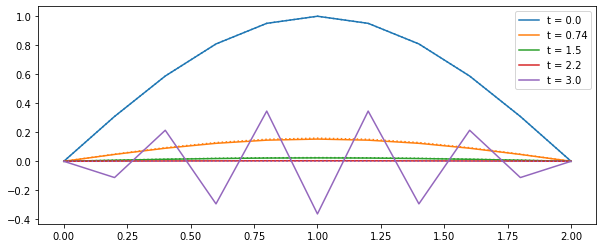

In [6]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[:,j], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[:, j], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

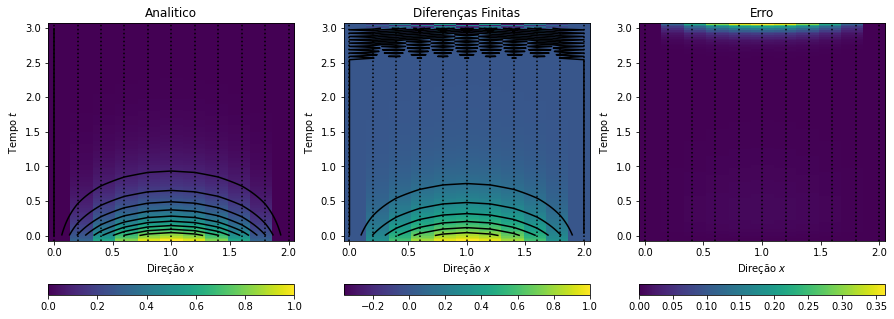

In [7]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, Tanalitic, axis[0])
plot_field(xmesh, tmesh, T, axis[1])
plot_field(xmesh, tmesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Tempo $t$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]

In [8]:
del xmesh
del tmesh
del T
del Tanalitic

### Exercicio 2

> $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \text{on} \ \Omega$$
> 
> No dominio 
> 
> $$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> 
> E condições de contorno
> 
> $$T(0, \ t) = T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> 
> $$T(x, \ 0) = 1 \ \ \ \ 0 < x < 1$$
> 
> A solução exata é dada por
> 
> $$T_{exact}(x, \ t) = \sum_{n=1}^{\infty} \dfrac{4}{(2n-1)\pi} \cdot \exp \left(-(2n-1)^2\pi^2 t\right) \cdot \sin \left((2n-1)\pi x\right)$$

Então resolvemos numericamente

In [9]:
xmin, xmax = 0, 1
tmin, tmax = 0, 0.3
nx, nt = 21, 238
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nx, nt), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    T[i, 0] = 1
for j, tj in enumerate(tmesh):
    T[0, j] = 0
    T[nx-1, j] = 0

stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[i, j+1] = T[i, j] + stencilx @ T[i-1:i+2, j]

In [10]:
Tanalitic = np.zeros(T.shape)
for n in range(1, 21):
    exppart = np.exp(-(2*n-1)**2*(np.pi**2)*tmesh)
    sinpart = np.sin((2*n-1)*np.pi*xmesh)
    Tanalitic += np.tensordot(sinpart, exppart, axes=0)/(2*n-1)
Tanalitic *= 4/np.pi

E mostramos os resultados

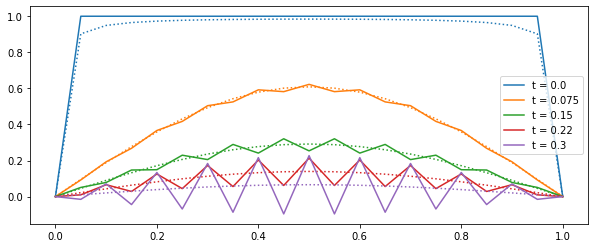

In [11]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[:, j], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[:, j], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

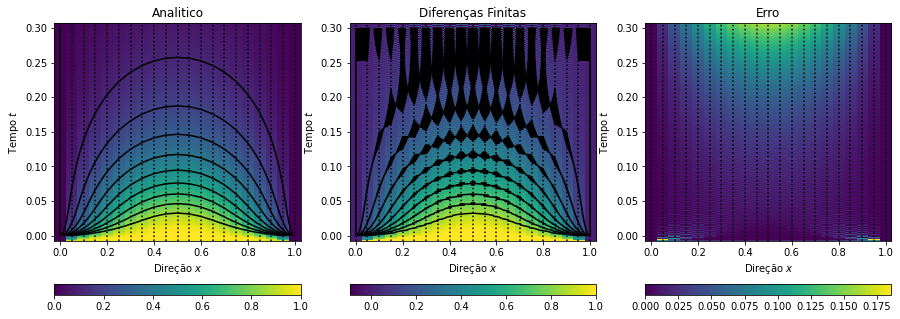

In [12]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, Tanalitic, axis[0])
plot_field(xmesh, tmesh, T, axis[1])
plot_field(xmesh, tmesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Tempo $t$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]

In [13]:
del xmesh
del tmesh
del T
del Tanalitic

### Exercicio 3

> $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \text{on} \ \Omega$$
> 
> No domínio 
> 
> $$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> 
> E condições de contorno
> 
> $$T(0, \ t) = 1 \ \ \ \ \ \forall 0 \le t$$
> $$T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> 
> $$T(x, \ 0) = 0 \ \ \ \ 0 < x < 1$$
> 
> A solucao exata é dada por
> 
> $$T_{exact}(x, \ t) = 1-x-\sum_{n=1}^{\infty} \dfrac{2}{n\pi} \cdot \exp \left(-n^2\pi^2 t\right) \cdot \sin \left(n\pi x\right)$$

Então resolvemos numericamente

In [14]:
xmin, xmax = 0, 1
tmin, tmax = 0, 0.3
nx, nt = 21, 238
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nx, nt), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    T[i, 0] = 0
for j, tj in enumerate(tmesh):
    T[0, j] = 1
    T[nx-1, j] = 0

stencilx = np.array([1, -2, 1]) * dt/dx**2
for j in range(nt-1):
    for i in range(1, nx-1):
        T[i, j+1] = T[i, j] + stencilx @ T[i-1:i+2, j]

In [15]:
Tanalitic = np.zeros(T.shape)
for n in range(1, 21):
    exppart = np.exp(-n**2*(np.pi**2)*tmesh)
    sinpart = np.sin(n*np.pi*xmesh)
    Tanalitic -= np.tensordot(sinpart, exppart, axes=0)/n
Tanalitic *= 2/np.pi
for i, xi in enumerate(xmesh):
    Tanalitic[i, :] += 1-xi

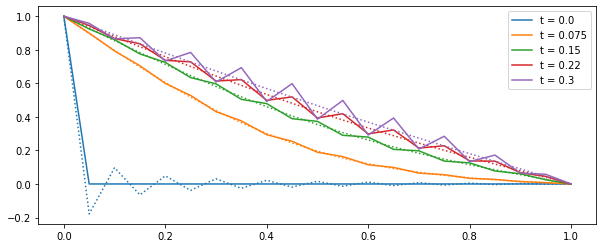

In [16]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[:, j], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[:, j], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

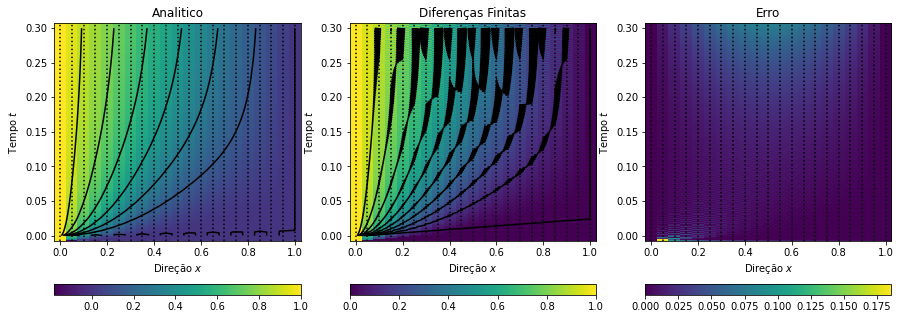

In [17]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, Tanalitic, axis[0])
plot_field(xmesh, tmesh, T, axis[1])
plot_field(xmesh, tmesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Tempo $t$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]

In [18]:
del xmesh
del tmesh
del T
del Tanalitic

### Exercicio 4

> $$\dfrac{\partial T}{\partial t} = 0.01\cdot \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \text{on} \ \Omega$$
> 
> No dominio
> 
> $$\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> 
> E condições de contorno
> 
> $$T(0, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> $$T(1, \ t) = 0 \ \ \ \ \ \forall 0 \le t$$
> 
> $$T(x, \ 0) = \begin{cases} 200x \ \ \  \ \ \  \ \ \  \ \ \ \text{if}  \ \ \ \ 0 \le x \le 0.5 \\ 200(1-x) \ \ \text{if} \ \ \ \  0.5 < x \le 1 \end{cases}$$
> 
> A solução analítica é dada por
> 
> $$T_{exact}(x, \ t) = \dfrac{800}{\pi^2}\sum_{n=0}^{\infty} \dfrac{(-1)^{n}}{(2n+1)^2} \cdot \exp \left(-(2n+1)^2\pi^2 \cdot 0.01 \cdot t\right) \cdot \sin \left((2n+1)\pi x\right)$$

Então resolvemos numericamente

In [19]:
xmin, xmax = 0, 1
tmin, tmax = 0, 3
nx, nt = 11, 10001
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nx, nt), dtype="float64")  # Result matrix
for i, xi in enumerate(xmesh):
    if xi > 0.5:
        T[i, 0] = 200*(1-xi)
    else:
        T[i, 0] = 200*xi
for j, tj in enumerate(tmesh):
    T[0, j] = 0
    T[nx-1, j] = 0

stencilx = 0.01*np.array([1, -2, 1]) * dt/dx**2
for k in range(nt-1):
    for i in range(1, nx-1):
        T[i, k+1] = T[i, k] + stencilx @ T[i-1:i+2, k]

In [20]:
Tanalitic = np.zeros(T.shape)
for n in range(0, 21):
    exppart = np.exp(-(2*n+1)**2*(np.pi**2)*0.01*tmesh)
    sinpart = np.sin((2*n+1)*np.pi*xmesh)
    Tanalitic += (-1)**n * np.tensordot(sinpart, exppart, axes=0)/((2*n+1)**2)
Tanalitic *= 800/(np.pi**2)

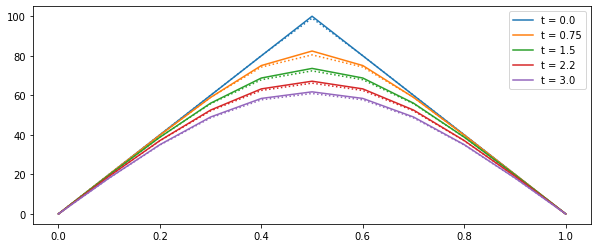

In [21]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for k in indexs:
    pl = plt.plot(xmesh, Tanalitic[:, k], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[:, k], label=f"t = {tmesh[k]:.2}", color=color)
plt.legend()

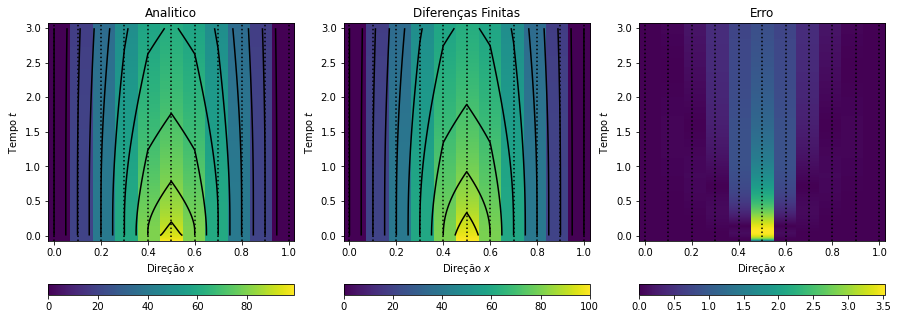

In [22]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, Tanalitic, axis[0])
plot_field(xmesh, tmesh, T, axis[1])
plot_field(xmesh, tmesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Tempo $t$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]

In [23]:
del xmesh
del tmesh
del T
del Tanalitic

### Exercicio 5

> $$\dfrac{\partial T}{\partial t} = 0.01\cdot \dfrac{\partial^2 T}{\partial x^2} \ \ \ \ \ \text{on} \ \Omega$$
>
> No dominio
> 
> $$\Omega = \underbrace{\left[0, \ 0.5\right]}_{x} \times \underbrace{\left[0, \ \infty\right)}_{t}$$
> 
> E condições de contorno
> 
> $$T(0, \ t) = 0 \ \ \ \ \ \forall \ 0 \le t$$
> $$\left[\dfrac{\partial T}{\partial x}\right]_{x=0.5}= 0 \ \ \ \ \ \forall \ 0 \le t$$
> $$T(x, \ 0) = 200x \ \ \ \ \ \forall  \ 0 \le x \le 0.5$$
> 
> A solução analítica é dada por
> 
> $$T_{exact}(x, \ t) = \dfrac{800}{\pi^2}\sum_{n=0}^{\infty} \dfrac{(-1)^{n}}{(2n+1)^2} \cdot \exp \left(-(2n+1)^2\pi^2 \cdot 0.01 \cdot t\right) \cdot \sin \left((2n+1)\pi x\right)$$

Então resolvemos numericamente


Neste caso temos uma diferença do exercício 4 pois este envolve a condição de Neumann (da derivada) e precisamos de uma reformulação. Até então o nosso método fornece um erro $\Theta(\delta t, \ \delta x^2)$ e queremos mantê-lo em $\delta x^2$

$$\left[\dfrac{\partial T}{\partial t} - \dfrac{\partial^2 T}{\partial x^2}\right]_{\begin{smallmatrix}x=x_{i} \\ t=t_k\end{smallmatrix}} = \dfrac{T_{k+1,i} - T_{k,i}}{\delta t} + \dfrac{-T_{k,i-1} + 2T_{k,i}- T_{k,i+1}}{\delta x^2} + \Theta(\delta t, \ \delta x^2) \ \ \ \ \ \ \ (5.1)$$

A derivada em $x$ pode ser descrita na borda $x = x_{n_{x}-1} = 0.5$ por:

$$
\left[\dfrac{\partial T}{\partial x}\right]_{x=x_{n_{x}-1}} = \dfrac{T_{k,n_{x}} - T_{k,n_{x}-2}}{2\delta x} + \Theta(\delta x^2)
$$

Sendo esse valor igual a zero teremos:

$$
\dfrac{T_{k,n_{x}} - T_{k,n_{x}-2}}{2\delta x}  = 0 \Rightarrow T_{k,n_{x}} = T_{k, n_{x}-2} \ \ \ \ \ \ \ (5.2)
$$

Contudo, na implementação numérica o valor $T_{k,n_x}$ não existe, pois adicionamos um nó fantasma em $x=x_{n_x}$.
Essa restrição diz que 'existe' um ponto simétrico além da fronteira, mas essa restrição não é suficiente para implementar, pois temos uma equação para um grau de liberdade (com o nó fantasma) que devemos relacionar, necessitando de outra equação.
Ela vem da aplicação 
Logo, aplicando a Equação $(5.1)$ no nó $x=x_{n_x-1}$ teremos


$$
\dfrac{T_{k+1,n_x-1} - T_{k,n_x-1}}{\delta t} + 0.01 \cdot \dfrac{-T_{k,n_x-2} + 2T_{k,n_x-1}- T_{k,n_x}}{\delta x^2} = 0
$$

que aplicando a Equação $(5.2)$ obteremos $(5.3)$

$$
\dfrac{T_{k+1,n_x-1} - T_{k,n_x-1}}{\delta t} + 0.01 \cdot \dfrac{2(T_{k,n_x-1}-T_{k,n_x-2})}{\delta x^2} = 0
$$
$$
T_{k+1, n_x-1} = \begin{bmatrix}\dfrac{0.02\delta t}{\delta x^2} & 1 -\dfrac{0.02\delta t}{\delta x^2}\end{bmatrix} 
\begin{bmatrix} T_{k,n_x-2} \\ T_{k,n_x-1}\end{bmatrix} \ \ \ \ \ \ \ (5.3)
$$


In [24]:
xmin, xmax = 0, 0.5
tmin, tmax = 0, 3
nx, nt = 21, 2000
dx = (xmax-xmin)/(nx-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nx, nt), dtype="float64")  # Result matrix
for j, tj in enumerate(tmesh):
    T[0, j] = 0
for i, xi in enumerate(xmesh):
    T[i, 0] = 200*xi

const = 0.01*dt/(dx**2)
stencilx = const*np.array([1, -2, 1])
for j in range(nt-1):
    T[nx-1,j+1] = 2*const*T[nx-2,j] + (1-2*const)*T[nx-1,j]
    for i in range(1, nx-1):
        T[i,j+1] = T[i,j] + stencilx @ T[i-1:i+2, j]
    

In [25]:
Tanalitic = np.zeros(T.shape)
for n in range(0, 21):
    exppart = np.exp(-(2*n+1)**2*(np.pi**2)*0.01*tmesh)
    sinpart = np.sin((2*n+1)*np.pi*xmesh)
    Tanalitic += (-1)**n * np.tensordot(sinpart, exppart, axes=0)/((2*n+1)**2)
Tanalitic *= 800/(np.pi**2)

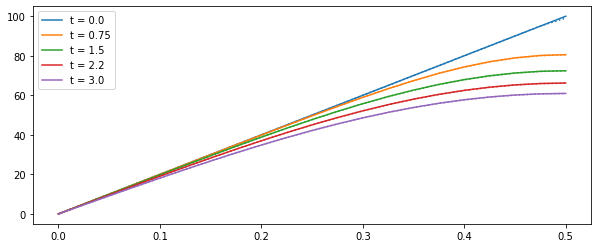

In [26]:
ncurves = 5
indexs = [int(curveindex) for curveindex in np.linspace(0, nt-1, ncurves)]
plt.figure(figsize=(10, 4))
for j in indexs:
    pl = plt.plot(xmesh, Tanalitic[:, j], ls="dotted")
    color = pl[0].get_color()
    plt.plot(xmesh, T[:, j], label=f"t = {tmesh[j]:.2}", color=color)
plt.legend()

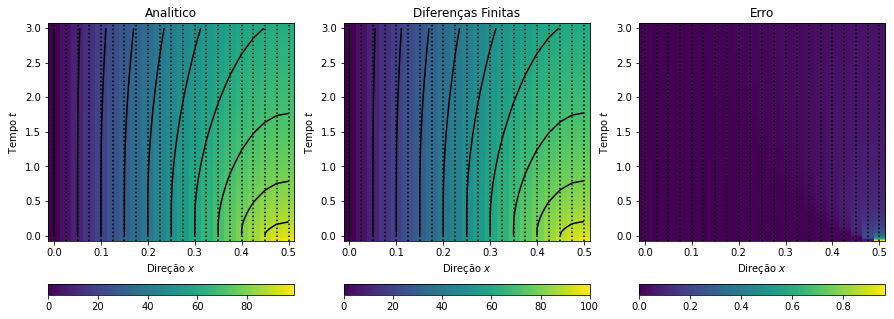

In [27]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, tmesh, Tanalitic, axis[0])
plot_field(xmesh, tmesh, T, axis[1])
plot_field(xmesh, tmesh, np.abs(T-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Tempo $t$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]

In [28]:
del xmesh
del tmesh
del T
del Tanalitic

### Exercicio 6

> $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}$$
> 
> No domínio
> 
> $$\Omega = \left[0,\ 1\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)$$
> 
> E condições iniciais
> 
> $$\begin{align*}T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)  \\ T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(1, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\ T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ 1\right]\times\left[0, \ 1\right] \end{align*}$$
> 
> A solução analítica estacionária quando $t\to \infty$ é dada por
> 
> $$T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}$$

Então resolvemos numericamente

In [29]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 10, 11, 1500
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx, ny), dtype="float64")  # Result matrix
for k in range(nt):
    T[k, :, ny-1] = np.sin(np.pi*xmesh)

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm(range(nt-1)):
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T[k+1, i, j] = T[k, i, j] + stencilx @ T[k, i-1:i+2, j] + stencily @ T[k, i, j-1:j+2]

100%|██████████| 1499/1499 [00:01<00:00, 848.74it/s]


In [30]:
sinhpiy = np.sinh(np.pi*ymesh)
sinpix = np.sin(np.pi*xmesh)
Tanalitic = np.tensordot(sinpix, sinhpiy, axes=0)/np.sinh(np.pi)

Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

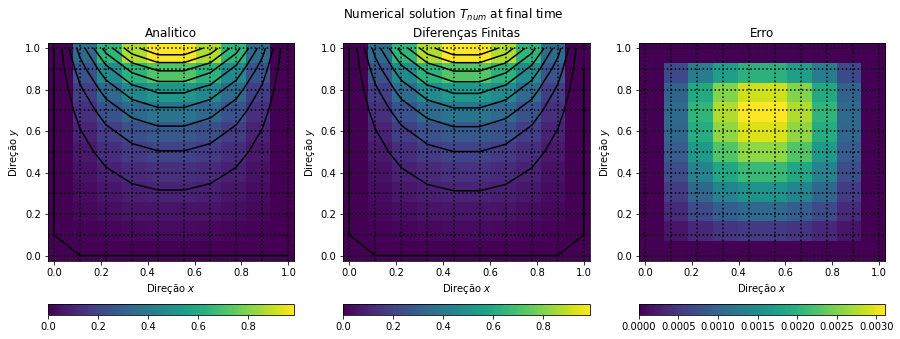

In [31]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T[-1], axis[1])
plot_field(xmesh, ymesh, np.abs(T[-1]-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [32]:
del xmesh
del ymesh
del tmesh
del T
del Tanalitic

### Exercicio 7

> $$\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}$$
> 
> No domínio
> 
> $$\Omega = \left[0,\ 0.5\right]\times\left[0,\ 1\right]\times\left[0,\ \infty\right)$$
> 
> E condições iniciais
> 
> $$\begin{align*} T(x, \ 0, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right) \\ T(x, \ 1, \ t) & = \sin \left(\pi x\right) \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0,\ \infty\right)  \\ T(0, \ y, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ \dfrac{\partial T}{\partial x}\left(\frac{1}{2}, \ y, \ t\right) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\ T(x, \ y, \ 0) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ \frac{1}{2}\right]\times\left[0, \ 1\right] \end{align*}$$
> 
> A solução analítica estacionária quando $t\to \infty$ é dada por
> 
> $$T_{analitic}(x, \ y,\ t\to \infty) = \dfrac{\sinh (\pi y) \sin (\pi x)}{\sinh \pi}$$

Então resolvemos numericamente

In [33]:
xmin, xmax = 0, 0.5
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 31, 31, 30001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx, ny), dtype="float64")  # Result matrix
for k, tk in enumerate(tmesh):
    T[k, :, ny-1] = np.sin(np.pi*xmesh)
stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] = (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += stencily[2] * T[k, 1:-1, 2:]
    T[k+1, nx-1, :] = T[k+1, nx-2, :]

100%|██████████| 30000/30000 [00:04<00:00, 6121.89it/s]


In [34]:
sinhpiy = np.sinh(np.pi*ymesh)
sinpix = np.sin(np.pi*xmesh)
Tanalitic = np.tensordot(sinpix, sinhpiy, axes=0)/np.sinh(np.pi)

Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

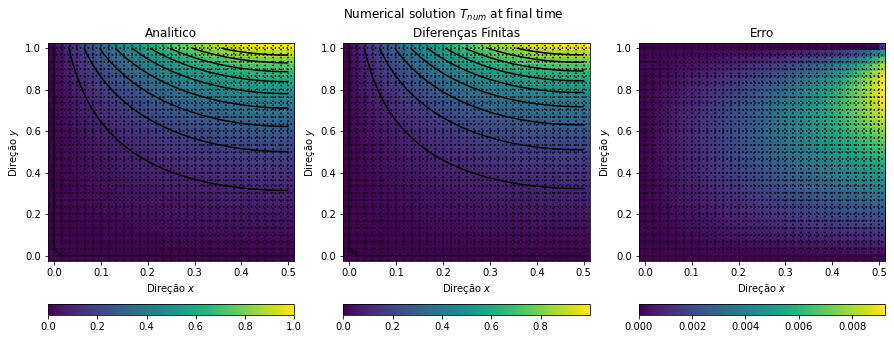

In [35]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T[-1], axis[1])
plot_field(xmesh, ymesh, np.abs(T[-1]-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [36]:
del xmesh
del ymesh
del tmesh
del T
del Tanalitic

### Exercicio 8

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

$$
\Omega = \underbrace{\left[0, \ 1\right]}_{x} \times \underbrace{\left[0, \ 1\right]}_{y} \times \underbrace{\left[0, \ \infty\right)}_{t}
$$

And boundary conditions

$$\begin{align*} T(x, \ 0, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(x, \ 1, \ t) & = \begin{cases}75x  \ \ \ \ \  \ \ \ \ \  \ \ \ \ \  \ \ \forall \left(x, \ t\right) \in \left[0, \ \frac{2}{3}\right]\times\left[0,\ \infty\right)  \\150(1-x)  \ \ \ \ \ \forall \left(x, \ t\right) \in \left(\frac{2}{3}, \ 1\right]\times\left[0,\ \infty\right) \end{cases} \\ T(0, \ y, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\ T(1, \ y, \ t) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\ T(x, \ y, \ 0) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in \left[0, \ 1\right]\times\left[0, \ 1\right]\end{align*}$$

A solução analítica estacionária quando $ t\to \infty $ é dada por

$$ T_{exact}(x, \ y,\ t\to \infty) = \dfrac{450}{\pi^2} \cdot \sum_{n=1}^{\infty}\dfrac{\sin \frac{2}{3}n\pi}{n^2 \sinh n\pi} \cdot \sinh (n\pi y) \sin (n \pi x)$$

Então resolvemos numericamente

In [37]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 10
nx, ny, nt = 15, 17, 30001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx, ny), dtype="float64")  # Result matrix
for k, tk in enumerate(tmesh):
    T[k, :, ny-1] = 75*xmesh * (xmesh <= 2/3) +  150*(1-xmesh) * (xmesh > 2/3) 

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] = (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencilx[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += stencily[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += stencily[2] * T[k, 1:-1, 2:]

100%|██████████| 30000/30000 [00:03<00:00, 7961.86it/s]


In [38]:
Tanalitic = np.zeros((nx, ny), dtype="float64")
for n in range(1, 41):
    const = np.sin(2*n*np.pi/3) / (n**2 * np.sinh(n*np.pi))
    sinnpix = np.sin(n*np.pi*xmesh)
    sinhnpiy = np.sinh(n*np.pi*ymesh)
    Tanalitic += const * np.tensordot(sinnpix, sinhnpiy, axes=0)
Tanalitic *= 450/np.pi**2

Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

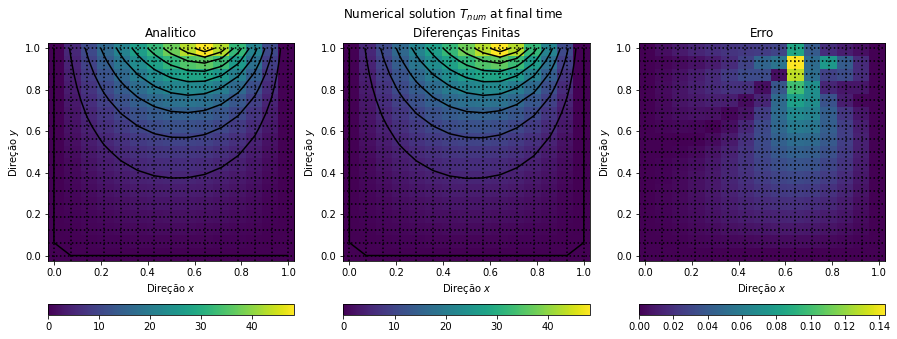

In [39]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T[-1], axis[1])
plot_field(xmesh, ymesh, np.abs(T[-1]-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [40]:
del xmesh
del ymesh
del tmesh
del T
del Tanalitic

### Exercicio 9

$$
\dfrac{\partial T}{\partial t} = \dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2}
$$

No domínio

\begin{align*}
S & = \left[0, \ 1\right] \times \left[0, \ 1\right] \\
C & = \left[0.4, \ 0.6\right] \times \left[0.4, \ 0.6\right]  \\
\Omega & = \left(S \setminus C \right) \times \left[0, \ \infty\right) \\
\end{align*}

And boundary conditions

\begin{align*}
T(x, \ 0, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(x, \ 1, \ t) & = 0 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(0, \ y, \ t) & = 0  \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right) \\
T(1, \ y, \ t) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(y, \ t\right) \in \left[0, \ 1\right]\times\left[0,\ \infty\right)\\
T(x, \ y, \ 0) & = 0   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in  \left(S \setminus C \right) \\
T(x, \ y, \ 0) & = 1   \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \forall \left(x, \ y\right) \in C
\end{align*}


A solução analítica estacionária quando $t\to \infty$ é dada por

$$
T_{exact}(x, \ y,\ t\to \infty) = \dfrac{450}{\pi^2} \cdot \sum_{n=1}^{\infty}\dfrac{\sin \frac{2}{3}n\pi}{n^2 \sinh n\pi} \cdot \sinh (n\pi y) \sin (n \pi x)
$$

Então resolvemos numericamente

In [41]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
tmin, tmax = 0, 3
nx, ny, nt = 41, 41, 150001
dx = (xmax-xmin)/(nx-1)
dy = (ymax-ymin)/(ny-1)
dt = (tmax-tmin)/(nt-1)
xmesh = np.linspace(xmin, xmax, nx)
ymesh = np.linspace(ymin, ymax, ny)
tmesh = np.linspace(tmin, tmax, nt)

T = np.zeros((nt, nx, ny), dtype="float64")  # Result matrix
xmask = (0.4 <= xmesh) * (xmesh <= 0.6)
ymask = (0.4 <= ymesh) * (ymesh <= 0.6)
Cmask = np.tensordot(xmask, ymask, axes=0)
Imask = ~Cmask[1:-1, 1:-1]
for k, tk in enumerate(tmesh):
    T[k, :, :] = Cmask

stencilx = np.array([1, -2, 1])*dt/(dx**2)
stencily = np.array([1, -2, 1])*dt/(dy**2)
for k in tqdm(range(nt-1)):
    T[k+1, 1:-1, 1:-1] += Imask * (1+stencilx[1]+stencily[1]) * T[k, 1:-1, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencilx[0] * T[k, 0:-2, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencilx[2] * T[k, 2:, 1:-1]
    T[k+1, 1:-1, 1:-1] += Imask*stencily[0] * T[k, 1:-1, 0:-2]
    T[k+1, 1:-1, 1:-1] += Imask*stencily[2] * T[k, 1:-1, 2:]

100%|██████████| 150000/150000 [00:37<00:00, 4006.35it/s]


Text(0.5, 0.98, 'Numerical solution $T_{num}$ at final time')

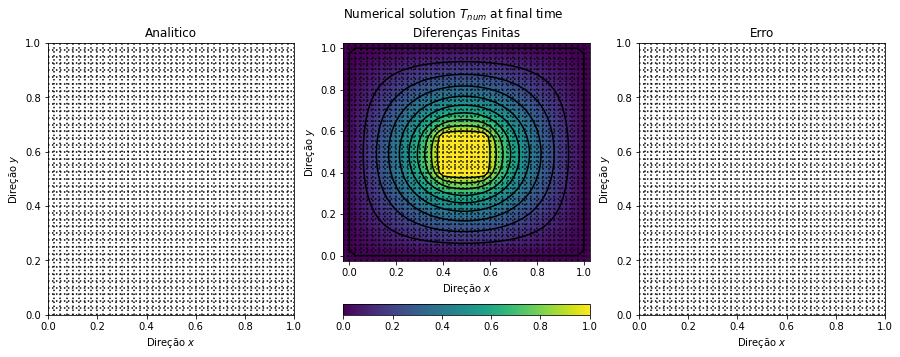

In [42]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
# plot_field(xmesh, ymesh, Tanalitic, axis[0])
plot_field(xmesh, ymesh, T[-1], axis[1])
# plot_field(xmesh, ymesh, np.abs(T[-1]-Tanalitic), axis[2], contour=False)

axis[0].set_title("Analitico")
axis[1].set_title("Diferenças Finitas")
axis[2].set_title("Erro")
for i in range(3):
    axis[i].set_xlabel(r"Direção $x$")
    axis[i].set_ylabel(r"Direção $y$")
    [axis[i].axvline(x=xi, ls="dotted", color="k") for xi in xmesh]
    [axis[i].axhline(y=yj, ls="dotted", color="k") for yj in ymesh]
fig.suptitle(r"Numerical solution $T_{num}$ at final time")

In [43]:
del xmesh
del ymesh
del tmesh
del T